# Clasificación por medio de una Red Convolucional
## Proyecto Final - Statistical Learning II

### Edgar Sabán 19012631

<img src="images/dataset-cover_.png">

Para este ejercicio se cuenta con un dataset de imágenes, el objetivo es hacer la clasificación correspondiente, las imágenes corresponden a señales de tránsito. Es importante realizar clasificaciones adecuadas con un alto acurracy, dado que el resultado de esta clasificación puede ser utilizada para que un vehículo autónomo pueda tomar la mejor decisión.

El conjunto de datos está integrado por 58,861 imágenes de 32x32 pixeles en rgb y un total de 43 clases o tipos de señales.

## Obteniendo los datos

In [30]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt


import cv2
from sklearn.model_selection import train_test_split

import keras
from keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from sklearn.metrics import classification_report

In [33]:
# Labels
labels = pd.read_csv("data/labels.csv")
labels.head()

,ClassId,Name
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [34]:
#Obteniendo los nombres de los directorios, los cuales coinciden
#con el número de clase asignada
directorios_label=[]
for file in os.listdir("data/imgs"):
    directorios_label.append(int(file))

directorios_label = sorted(directorios_label)
print(directorios_label)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [35]:
dataset=[]
labels=[]
count=0
for file in directorios_label:
    path=os.path.join("data/imgs",str(file))
    for img in os.listdir(path): 
        image = cv2.imread(os.path.join(path,img))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = image/255.0 #Normalizando la imagen
        dataset.append(image)
        labels.append(count)
    count+=1

In [36]:
dataset = np.array(dataset)
dataset.shape

(58861, 32, 32, 3)

In [37]:
labels = np.array(labels)
labels.shape

(58861,)

In [38]:
# Train y Test
train_X,test_X,train_Y,test_Y = train_test_split(dataset,labels,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (47088, 32, 32, 3) (47088,)
Testing data shape :  (11773, 32, 32, 3) (11773,)


In [39]:
#One hot encoding
num_classes = 30
train_labels = to_categorical(train_Y, num_classes)
test_labels = to_categorical(test_Y, num_classes)

## Red Neuronal Convolucional

In [40]:
# Configuración del Modelo
lr = 0.001
epochs = 10
batch_size = 128

In [41]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding='same',input_shape=(32,32,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               803072    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)              

In [42]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=lr),metrics=['accuracy'])
history_model = model.fit(train_X, train_labels, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(test_X, test_labels))

2021-09-24 16:17:58.581767: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 578617344 exceeds 10% of free system memory.


Epoch 1/10
368/368 [==============================] - 27s 73ms/step - loss: 1.2895 - accuracy: 0.6316 - val_loss: 0.2925 - val_accuracy: 0.9293
Epoch 2/10
368/368 [==============================] - 31s 83ms/step - loss: 0.3307 - accuracy: 0.9026 - val_loss: 0.1322 - val_accuracy: 0.9667
Epoch 3/10
368/368 [==============================] - 30s 82ms/step - loss: 0.1947 - accuracy: 0.9424 - val_loss: 0.0789 - val_accuracy: 0.9792
Epoch 4/10
368/368 [==============================] - 29s 79ms/step - loss: 0.1384 - accuracy: 0.9586 - val_loss: 0.0554 - val_accuracy: 0.9856
Epoch 5/10
368/368 [==============================] - 34s 92ms/step - loss: 0.1112 - accuracy: 0.9653 - val_loss: 0.0500 - val_accuracy: 0.9873
Epoch 6/10
368/368 [==============================] - 35s 94ms/step - loss: 0.0939 - accuracy: 0.9714 - val_loss: 0.0337 - val_accuracy: 0.9916
Epoch 7/10
368/368 [==============================] - 32s 86ms/step - loss: 0.0724 - accuracy: 0.9778 - val_loss: 0.0281 - val_accuracy:

In [43]:
loss, accuracy = model.evaluate(test_X, test_labels, verbose=True)

368/368 [==============================] - 2s 6ms/step - loss: 0.0193 - accuracy: 0.9954


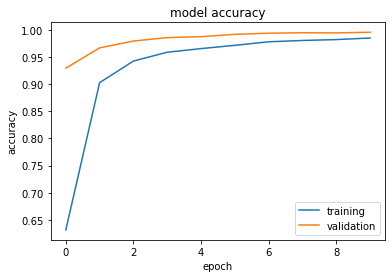

Test loss: 0.0193
Test accuracy: 0.995


In [44]:
plt.plot(history_model.history['accuracy'])
plt.plot(history_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

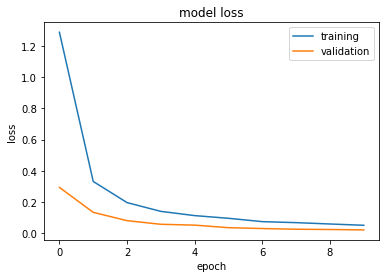

Test loss: 0.0193
Test accuracy: 0.995


In [45]:
plt.plot(history_model.history['loss'])
plt.plot(history_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [46]:
# Predicción
Y = model.predict(test_X)

In [47]:
Y = np.apply_along_axis(np.argmax, axis = 1, arr = Y)

11719 imágenes clasificadas correctamente


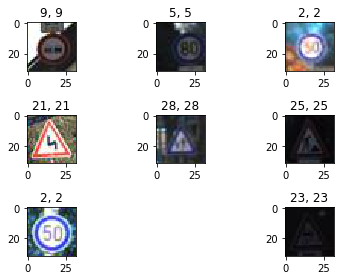

In [48]:
correct = np.where(Y==test_Y)[0]
print("%d imágenes clasificadas correctamente" % len(correct))

for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(32,32,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(Y[correct],np.argmax(test_labels[correct])))
    plt.tight_layout()

54 imágenes clasificadas incorrectamente


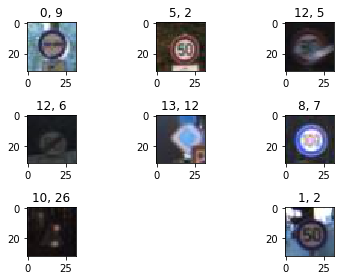

In [49]:
incorrect = np.where(Y!=test_Y)[0]
print("%d imágenes clasificadas incorrectamente" % len(incorrect))

for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(32,32,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(Y[incorrect],np.argmax(test_labels[incorrect])))
    plt.tight_layout()